In [1]:
!pip install tensorflow

In [2]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 import warnings
 import tensorflow as tf
 warnings.filterwarnings("ignore")
 from sklearn.metrics import mean_absolute_error
 from tensorflow.keras.models import Sequential
 from tensorflow.keras.layers import LSTM, Dense
 from tqdm import tqdm

In [3]:
df1=pd.read_csv('TCS_stock_action.csv')
df2=pd.read_csv('TCS_stock_history.csv')
df3=pd.read_csv('TCS_stock_info.csv')

In [4]:
df1.head()

,Date,Dividends,Stock Splits
0,2004-10-28,0.3750,0.0
1,2005-02-03,0.4375,0.0
2,2005-07-06,0.6250,0.0
3,2005-08-18,0.3750,0.0
4,2005-10-18,0.3750,0.0


In [5]:
df1.columns

Index(['Date', 'Dividends', 'Stock Splits'], dtype='object')

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          70 non-null     object 
 1   Dividends     70 non-null     float64
 2   Stock Splits  70 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.8+ KB


In [7]:
df2.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [8]:
df2.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4463 non-null   object 
 1   Open          4463 non-null   float64
 2   High          4463 non-null   float64
 3   Low           4463 non-null   float64
 4   Close         4463 non-null   float64
 5   Volume        4463 non-null   int64  
 6   Dividends     4463 non-null   float64
 7   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 279.1+ KB


In [10]:
df3.head()

,zip,400001
0,sector,Technology
1,fullTimeEmployees,509058
2,longBusinessSummary,Tata Consultancy Services Limited provides inf...
3,city,Mumbai
4,phone,91 22 6778 9999


In [11]:
df3.columns

Index(['zip', '400001'], dtype='object')

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   zip     150 non-null    object
 1   400001  108 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


In [13]:
 df2['Date'] = pd.to_datetime(df2['Date'])
 df2 = df2.sort_values(by='Date')

In [14]:
df2.describe()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4463,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000
mean,2012-08-23 19:22:31.109119488,866.936239,876.675013,856.653850,866.537398,3.537876e+06,0.071533,0.001344
min,2002-08-12 00:00:00,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000
25%,2008-02-14 12:00:00,188.951782,191.571816,185.979417,188.594620,1.860959e+06,0.000000,0.000000
50%,2012-09-04 00:00:00,530.907530,534.751639,525.616849,529.713257,2.757742e+06,0.000000,0.000000
75%,2017-03-22 12:00:00,1156.462421,1165.815854,1143.622800,1154.784851,4.278625e+06,0.000000,0.000000
max,2021-09-30 00:00:00,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000
std,NaN,829.905368,838.267104,821.233477,829.611313,3.273531e+06,0.965401,0.051842


In [15]:
 corel=df2.corr()
 corel

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,1.000000,0.899114,0.899354,0.898962,0.899214,-0.177351,0.062321,-0.005701
Open,0.899114,1.000000,0.999888,0.999892,0.999787,-0.153362,0.059743,-0.006715
High,0.899354,0.999888,1.000000,0.999867,0.999914,-0.150918,0.060044,-0.006597
Low,0.898962,0.999892,0.999867,1.000000,0.999901,-0.154962,0.059916,-0.006622
Close,0.899214,0.999787,0.999914,0.999901,1.000000,-0.152844,0.060179,-0.006635
Volume,-0.177351,-0.153362,-0.150918,-0.154962,-0.152844,1.000000,-0.010332,0.004752
Dividends,0.062321,0.059743,0.060044,0.059916,0.060179,-0.010332,1.000000,0.142493
Stock Splits,-0.005701,-0.006715,-0.006597,-0.006622,-0.006635,0.004752,0.142493,1.000000


In [16]:
 correlation_with_close= df2.corr()['Close'].sort_values(ascending=False)
 print(correlation_with_close)

Close           1.000000
High            0.999914
Low             0.999901
Open            0.999787
Date            0.899214
Dividends       0.060179
Stock Splits   -0.006635
Volume         -0.152844
Name: Close, dtype: float64


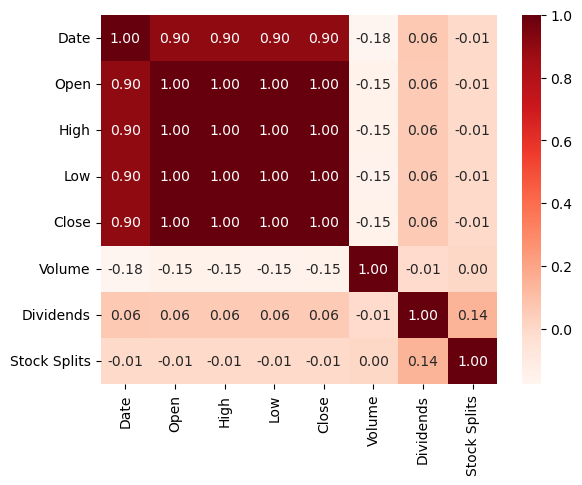

In [17]:
 sns.heatmap(corel,annot= True,cmap= "Reds",fmt=".2f")
 plt.show()

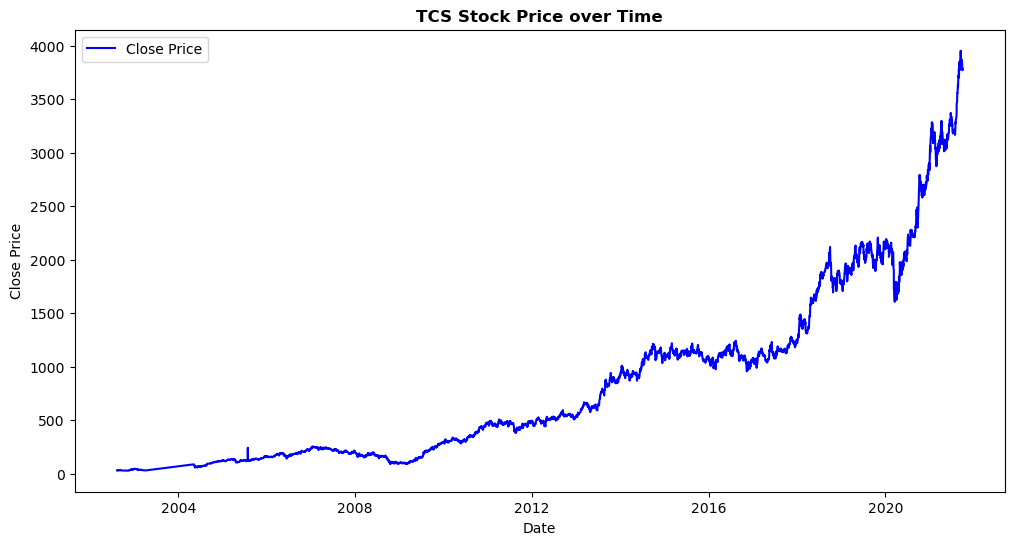

In [18]:
 plt.figure(figsize=(12, 6))
 plt.plot(df2['Date'], df2['Close'], label='Close Price',
 color='b')
 plt.xlabel('Date')
 plt.ylabel('Close Price')
 plt.title('TCS Stock Price over Time',weight = "bold")
 plt.legend()
plt.show()

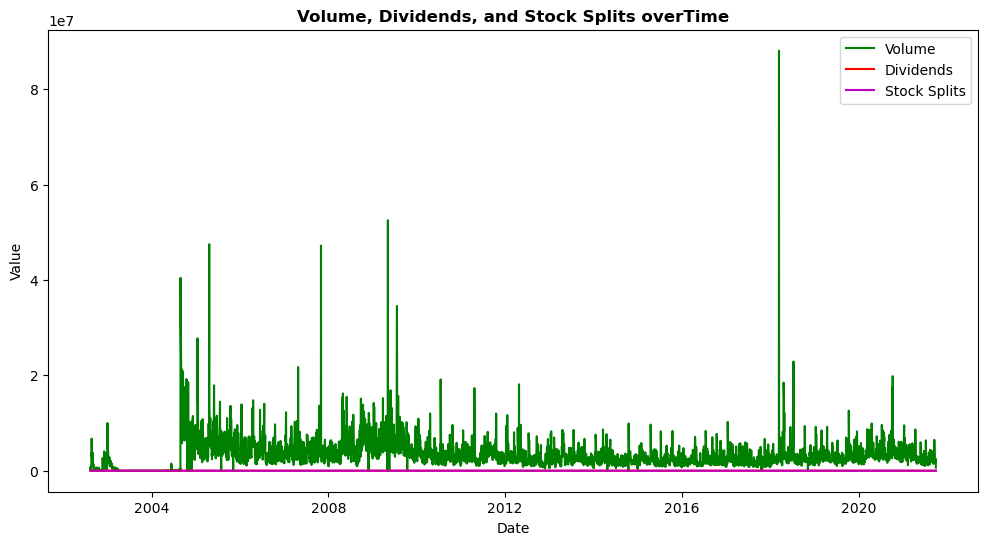

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df2['Date'], df2['Volume'], label='Volume', color='g')
plt.plot(df2['Date'], df2['Dividends'], label='Dividends',color='r')
plt.plot(df2['Date'], df2['Stock Splits'], label='Stock Splits',color='m')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Volume, Dividends, and Stock Splits overTime',weight = "bold")
plt.legend()
plt.show()

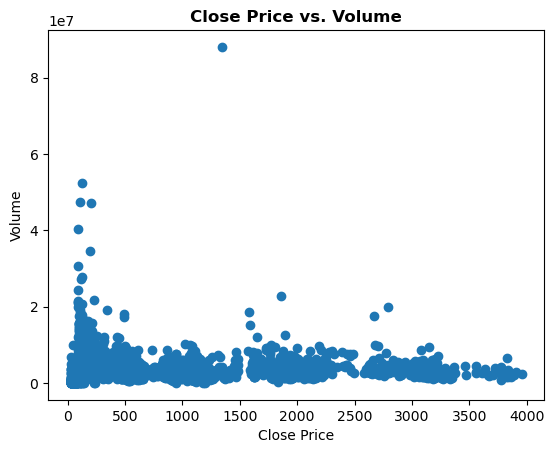

In [20]:
 plt.scatter(df2['Close'], df2['Volume'])
 plt.xlabel('Close Price')
 plt.ylabel('Volume')
 plt.title('Close Price vs. Volume',weight= "bold")
 plt.show()

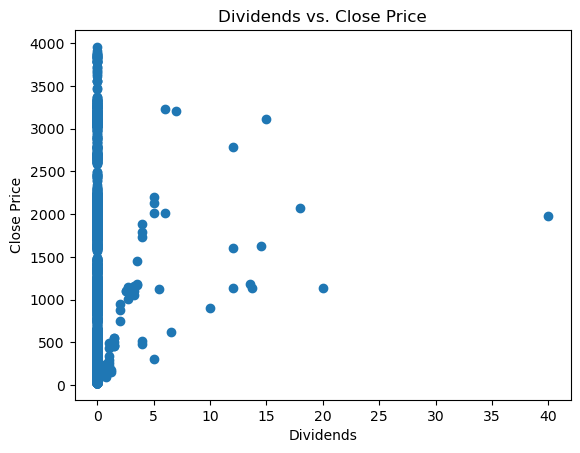

In [21]:
 # Dividends vs. Close Price
 plt.scatter(df2['Dividends'], df2['Close'])
 plt.xlabel('Dividends')
 plt.ylabel('Close Price')
 plt.title('Dividends vs. Close Price')
 plt.show()

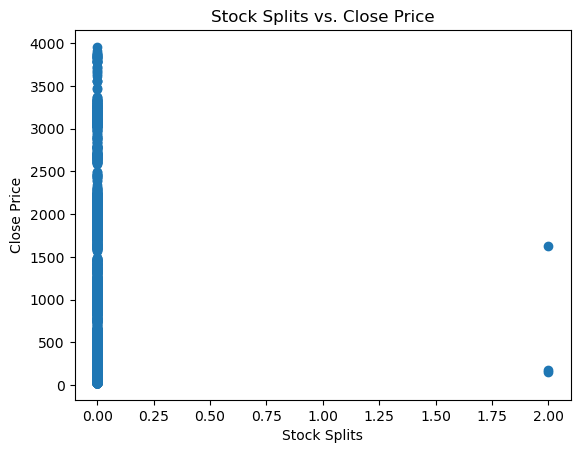

In [22]:
 plt.scatter(df2['Stock Splits'], df2['Close'])
 plt.xlabel('Stock Splits')
 plt.ylabel('Close Price')
 plt.title('Stock Splits vs. Close Price')
 plt.show()

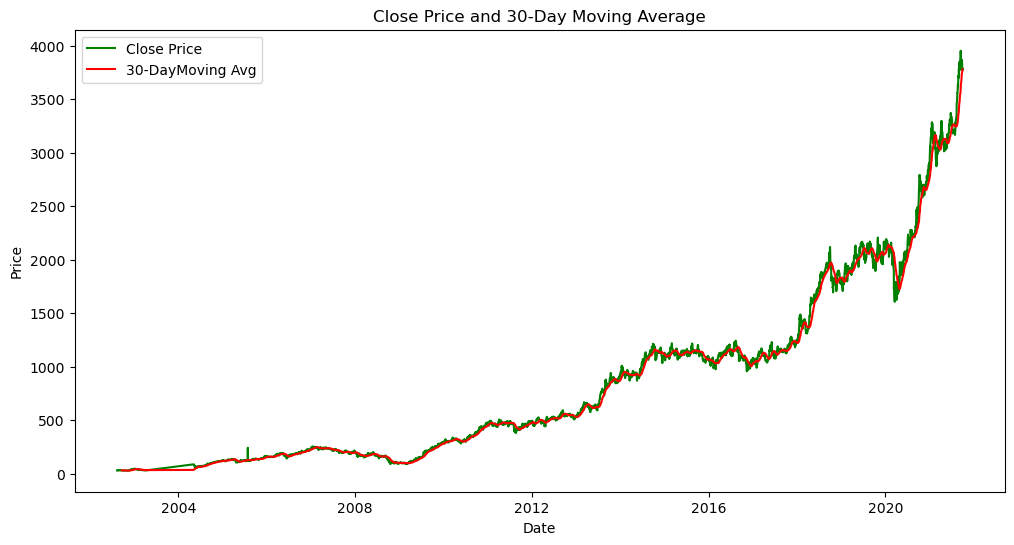

In [23]:
 df2['30-Day Moving Avg'] = df2['Close'].rolling(window=30).mean()
 # Plot Close price and moving average
 plt.figure(figsize=(12, 6))
 plt.plot(df2['Date'], df2['Close'], label='Close Price',
 color='g')
 plt.plot(df2['Date'], df2['30-Day Moving Avg'], label='30-DayMoving Avg', color='r')
 plt.xlabel('Date')
 plt.ylabel('Price')
 plt.title('Close Price and 30-Day Moving Average')
 plt.legend()
 plt.show()

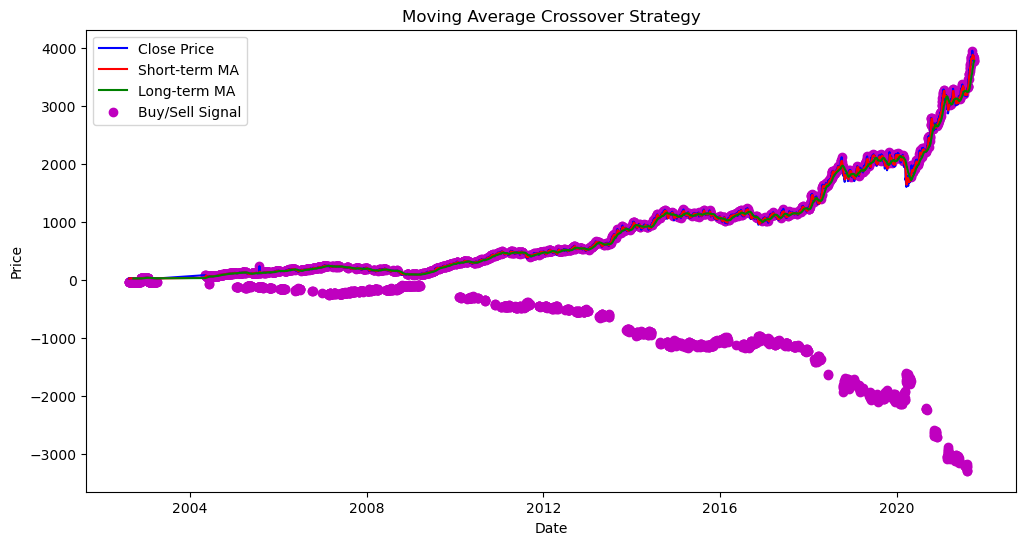

In [24]:
 df2['Short_MA'] = df2['Close'].rolling(window=5).mean()
 df2['Long_MA'] = df2['Close'].rolling(window=30).mean()
 # Creating a trading signals based on moving average crossovers
 df2['Signal'] = np.where(df2['Short_MA'] > df2['Long_MA'], 1,-1)
 # Plot the strategy signals
 plt.figure(figsize=(12, 6))
 plt.plot(df2['Date'], df2['Close'], label='Close Price',
 color='b')
 plt.plot(df2['Date'], df2['Short_MA'], label='Short-term MA',
 color='r')
 plt.plot(df2['Date'], df2['Long_MA'], label='Long-term MA',
 color='g')
 plt.scatter(df2['Date'], df2['Close'] * df2['Signal'],
 label='Buy/Sell Signal', marker='o', color='m')
 plt.xlabel('Date')
 plt.ylabel('Price')
 plt.title('Moving Average Crossover Strategy')
 plt.legend()
 plt.show()

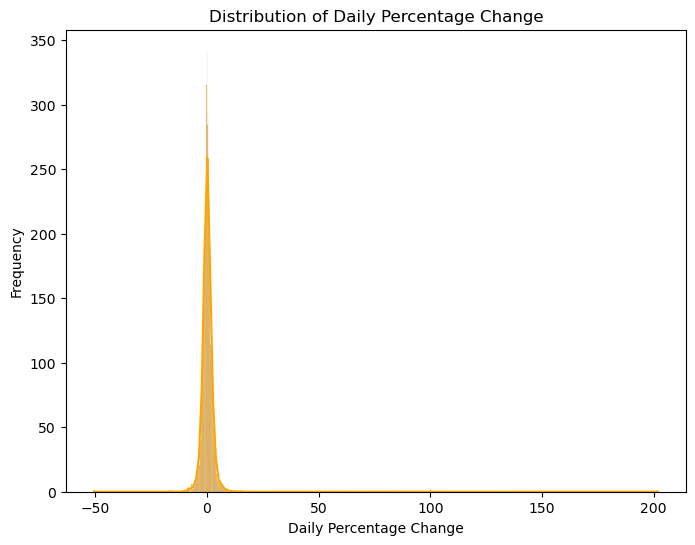

In [25]:
df2['Daily_Price_Change'] = df2['Close'].pct_change() * 100
# Distribution of daily percentage change
plt.figure(figsize=(8, 6))
sns.histplot(df2['Daily_Price_Change'].dropna(), kde=True,
color='orange')
plt.xlabel('Daily Percentage Change')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Percentage Change')
plt.show()


In [26]:
df2['Moving_Avg_Close'] = df2['Close'].rolling(window=7).mean()


In [27]:
df2.shape


(4463, 14)

In [29]:
# Prepare the data for LSTM
X_train = df2['Close'].values.reshape(-1, 1)
y_train = df2['Close'].shift(-1).dropna().values
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# Define the test data
test_ratio = 0.2
test_size = int(len(df2) * test_ratio)
test_data = df2[-test_size:]
# Prepare the data for prediction
X_test = test_data['Close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)
#Reshaping Data
# Reshape the data for LSTM
X_train_lstm = X_train_scaled[:-1].reshape(-1, 1, 1)
y_train_lstm = X_train_scaled[1:]
#Building a LSTM Model
model = Sequential()
model.add(LSTM(50, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
# Set the number of epochs and batch size
epochs = 30
batch_size = 15
# Train the model with tqdm progress bar
for epoch in tqdm(range(epochs)):
  for i in range(0, len(X_train_lstm), batch_size):
     X_batch = X_train_lstm[i:i+batch_size]
     y_batch = y_train_lstm[i:i+batch_size]
     model.train_on_batch(X_batch, y_batch)
# Prepare the data for prediction
X_test = test_data['Close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)



100%|███████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:21<00:00,  1.42it/s]


In [30]:
#Predictions using LSTM
lstm_predictions = model.predict(X_test_lstm).flatten()


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [31]:
#Inverse transform of the predictions
lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)


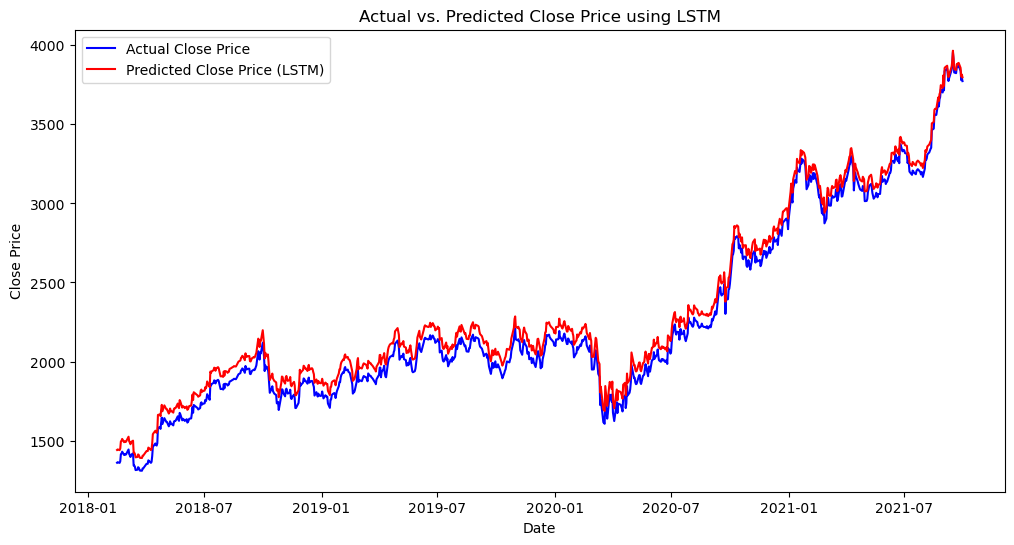

In [34]:
#Visualization of LSTM predictions
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['Close'], label='Actual Close Price', color='b')
plt.plot(test_data['Date'], lstm_predictions, label='Predicted Close Price (LSTM)', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price using LSTM')
plt.legend()
plt.show()


In [35]:
#Mean Absolute Error
lstm_mae = mean_absolute_error(test_data['Close'],
lstm_predictions)
print("LSTM Mean Absolute Error:", lstm_mae)


LSTM Mean Absolute Error: 73.06962154371323


In [36]:
lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
date_index = test_data.index[-len(lstm_predictions):]
predictions_df2 = pd.DataFrame({'Date': date_index,'Predicted_Close': lstm_predictions.flatten()})
predictions_df2.to_csv('predictions.csv', index=False)